### Q Learning
![QLearning](./image/q-learning.png)

In [1]:
import matplotlib.pyplot as plt
from IPython import display
from IPython.display import clear_output
from brain.QLearning import QLearningTable
from utils import *
import gym
import time
import pandas
import numpy as np
import ipdb
import pickle
from tqdm import tqdm
%matplotlib inline

In [2]:
env = gym.make('CartPole-v0')
agent = QLearningTable(actions=list(range(env.action_space.n)),
                       alpha=0.5, gamma=0.90, epsilon=0.1)

### Before Training (Random Policy)

In [3]:
def try_one_episode(max_episode=200):
    observation = env.reset()
    for i in range(max_episode):
        env.render(mode='rgb_array')
        observation = discretize(observation)
        show_state(env, i, None)
        action = agent.chooseAction(observation)
        observation, reward, done, info = env.step(action)
        if done:
            break
    clear_output(wait=True)

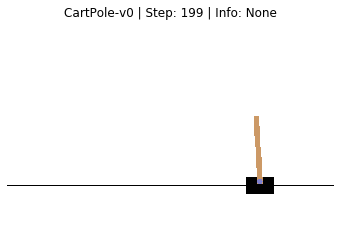

In [5]:
try_one_episode(max_episode=200)    # 1000 for mauntaincar

In [4]:
final_rewards = []
max_episode = 200    # 1000 for mauntaincar
for episode in tqdm(range(1000)):
    # train 100 times
    # initial observation
    observation = env.reset()
    observation = discretize(observation)
    rewards = []

    for t in range(max_episode):
        # RL choose action based on observation
        action = agent.chooseAction(observation)

        # RL take action and get next observation and reward
        observation_, reward, done, info = env.step(action)
        observation_ = discretize(observation_)

        rewards.append(reward)
        if not(done):
            agent.learn(observation, action, reward, observation_)
            observation = observation_
        else:
            reward = -200
            agent.learn(observation, action, reward, observation_)
            break

    final_rewards.append(np.sum(rewards))

clear_output(wait=True)

  0%|          | 0/1000 [00:00<?, ?it/s]


ValueError: not enough values to unpack (expected 4, got 2)

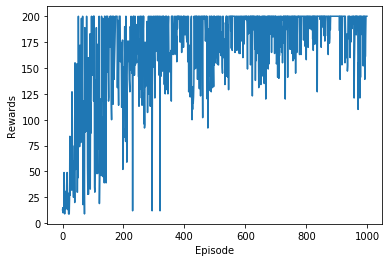

In [7]:
x = np.arange(len(final_rewards))
plt.plot(x, final_rewards)
plt.xlabel('Episode')
plt.ylabel('Rewards')
plt.savefig('./image/q-learning-cartpole.png')

### Save the model

In [8]:
with open('./save/q-learning-cartpole.pkl', 'wb') as f:
    pickle.dump(agent, f)

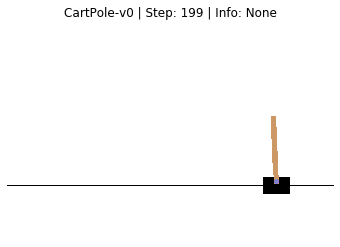

In [9]:
try_one_episode()

### Load the model

In [3]:
with open('./save/q-learning-cartpole.pkl', 'rb') as f:
    agent = pickle.load(f)